# Récupération des données propres

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st

df = pd.read_csv('dataset_cleaned.csv')


# Analyse des données univariées

### Graphiques des données pour la variable région


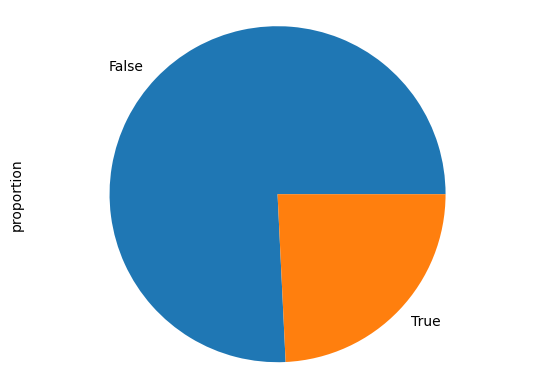

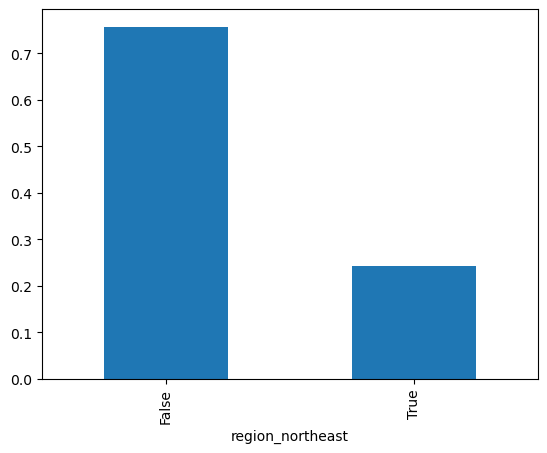

In [3]:
# Diagramme en secteurs
df["region_northeast"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
df["region_northeast"].value_counts(normalize=True).plot(kind='bar')
plt.show()

### Graphiques des données pour la variable age

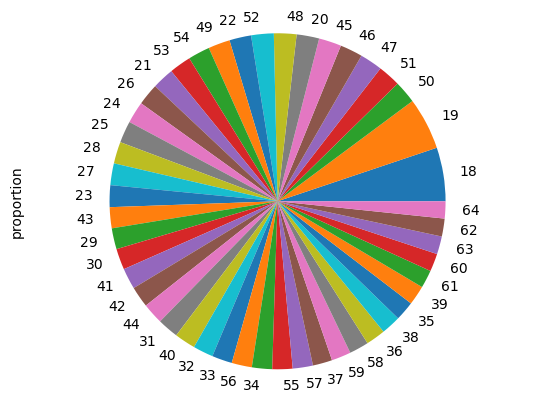

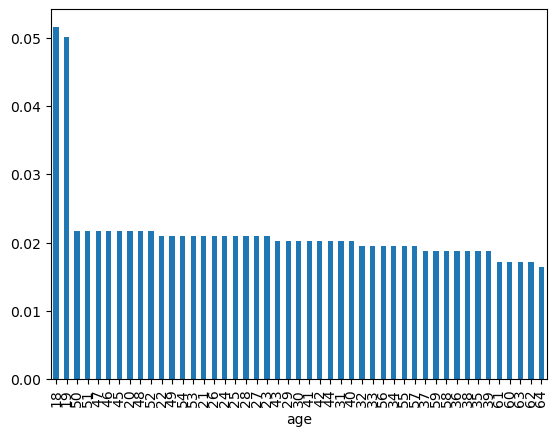

In [63]:
# Diagramme en secteurs
df["age"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
df["age"].value_counts(normalize=True).plot(kind='bar')
plt.show()

### Graphiques des données pour la variable fumeur

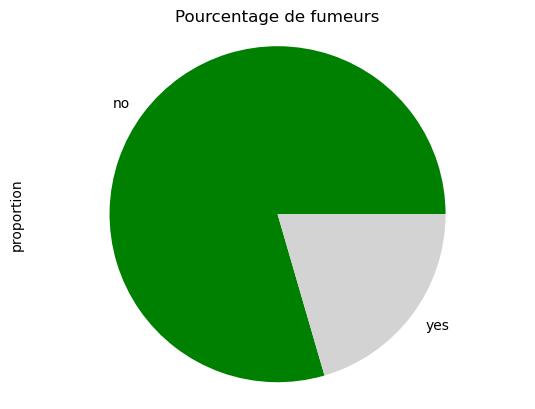

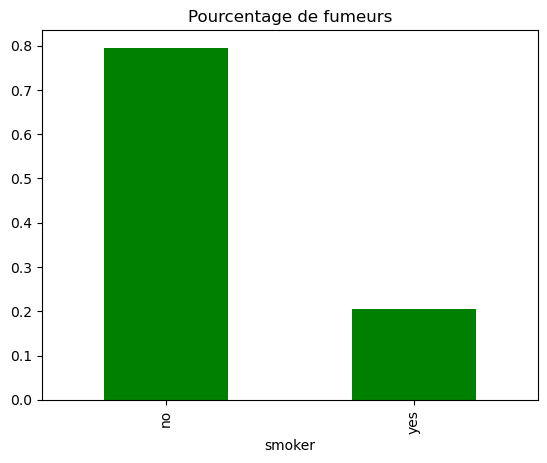

In [5]:
custom_col = ["green","lightgrey"]
# Diagramme en secteurs
df["smoker"].value_counts(normalize=True).plot(kind='pie', colors=custom_col).set(title="Pourcentage de fumeurs")

plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
df["smoker"].value_counts(normalize=True).plot(kind='bar', color="green").set(title="Pourcentage de fumeurs")
plt.show()

### Graphique des données pour la variable sexe

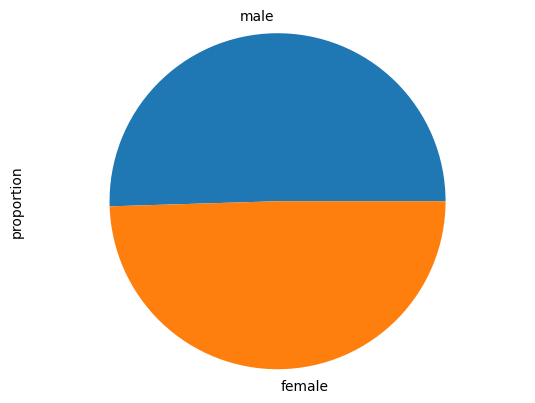

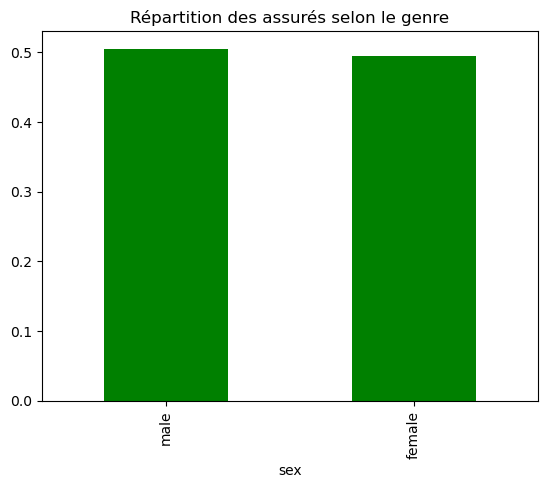

In [27]:
# Diagramme en secteurs
df["sex"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
df["sex"].value_counts(normalize=True).plot(kind='bar', color="green").set(title="Répartition des assurés selon le genre")
plt.show()

### Graphique des données pour la variable enfants

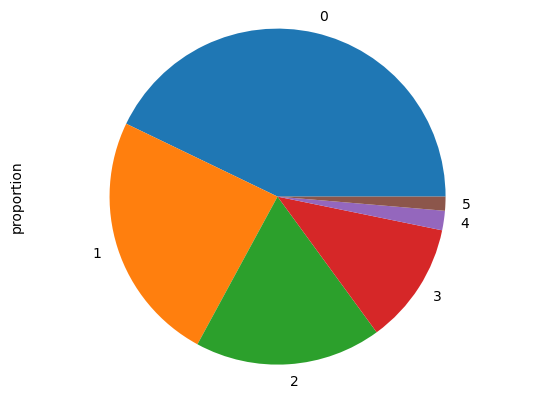

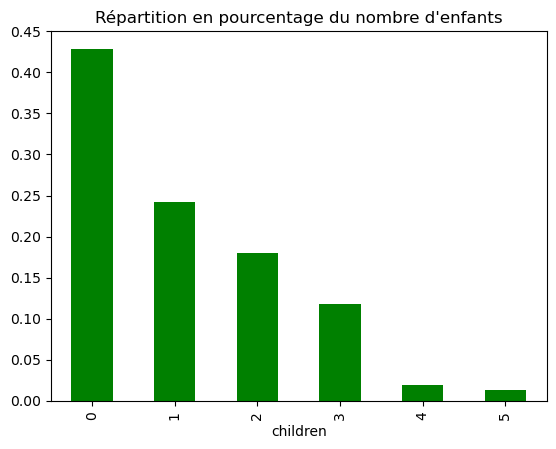

In [28]:
# Diagramme en secteurs
df["children"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
df["children"].value_counts(normalize=True).plot(kind='bar', color="green").set(title="Répartition en pourcentage du nombre d'enfants")
plt.show()

### Graphique des données pour la variable IMC

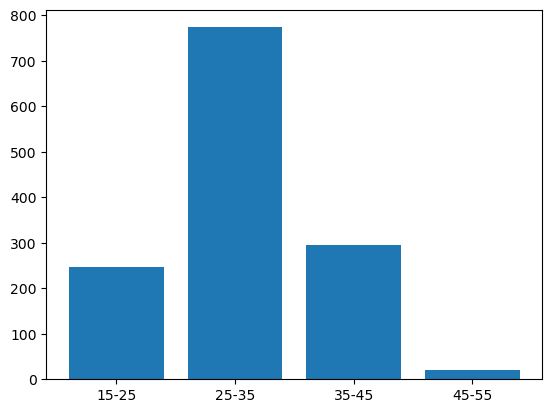

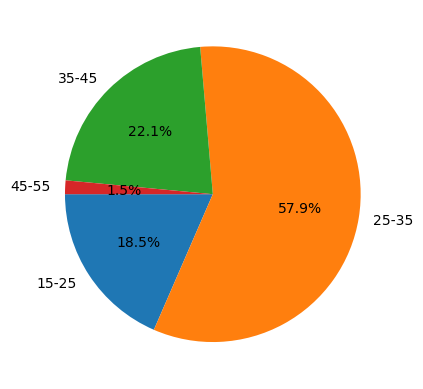

In [6]:
# Diagramme en barres
sections = [15, 25, 35, 45, 55]
df['sections'] = pd.cut(df['bmi'], bins=sections, labels=['15-25', '25-35', '35-45' , '45-55'])
grouped_data = df.groupby('sections').size().reset_index(name='count')
plt.bar(grouped_data['sections'], grouped_data['count'])
plt.show() # Affiche le graphique

# Diagramme en camembert
plt.pie(grouped_data['count'], labels=grouped_data['sections'], autopct='%1.1f%%', startangle=180)
plt.show()

### Graphique des données pour la variable Charges

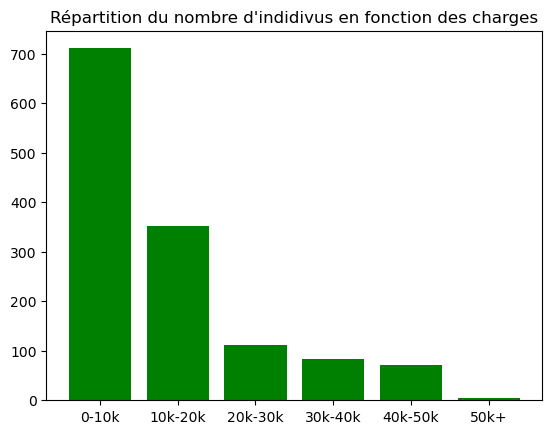

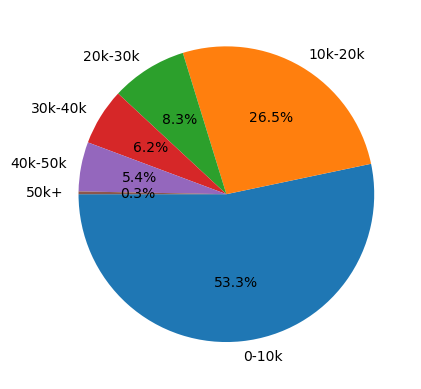

In [2]:
# Diagramme en barres
sections = [0, 10000, 20000, 30000, 40000, 50000, 60000]
df['sections'] = pd.cut(df['charges'], bins=sections, labels=['0-10k', '10k-20k', '20k-30k' , '30k-40k' , '40k-50k' , '50k+'])
grouped_data = df.groupby('sections').size().reset_index(name='count')
plt.bar(grouped_data['sections'], grouped_data['count'], color="green")
plt.title("Répartition du nombre d'indidivus en fonction des charges")
plt.show() # Affiche le graphique

# Diagramme en camembert
plt.pie(grouped_data['count'], labels=grouped_data['sections'], autopct='%1.1f%%', startangle=180)
plt.show()

## Matrice de corrélation 

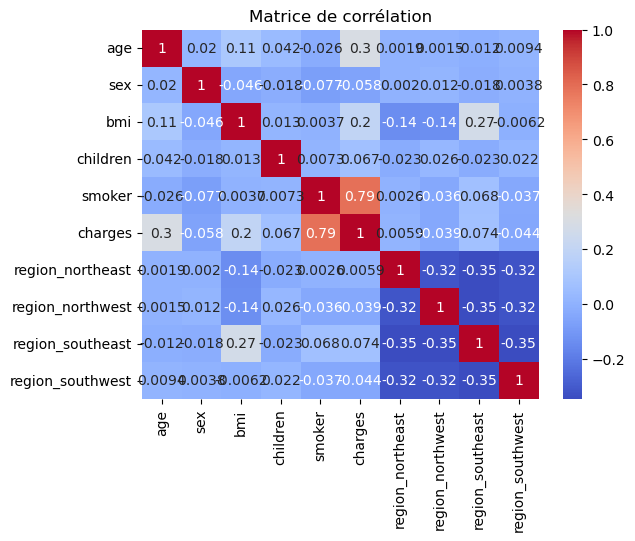

In [74]:
corr_matrix = df.corr(method="pearson")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

# Analyses bivariées

### Analyse corrélation de la variable sexe avec les charges

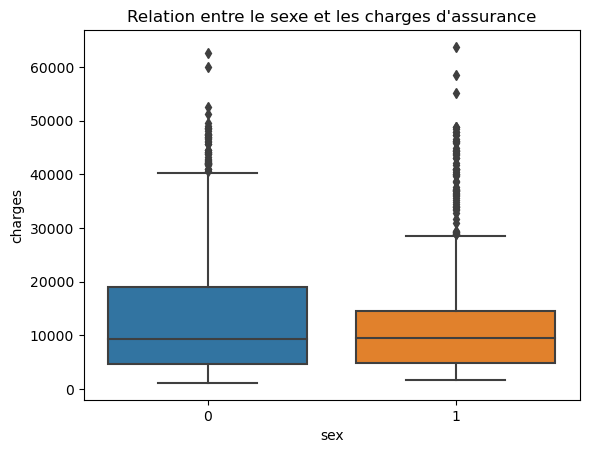

In [72]:
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Relation entre le sexe et les charges d\'assurance')
plt.show()

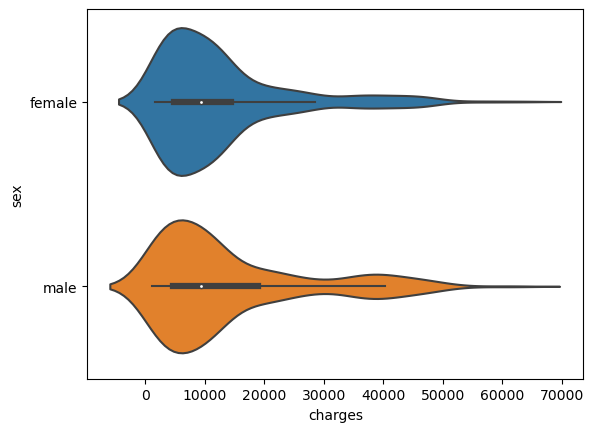

In [60]:

# Tracer un diagramme de dispersion avec ajustement linéaire
sns.violinplot(x=df['charges'], y=df['sex'], data=df)
plt.show()

### Analyse corrélation de la variable children avec les charges

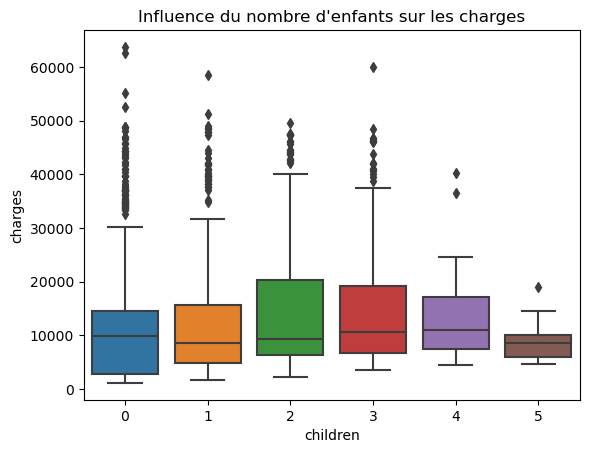

In [11]:

# Tracer un diagramme de dispersion avec ajustement linéaire
sns.boxplot(x=df['children'], y=df['charges'], data=df)
plt.title("Influence du nombre d'enfants sur les charges")
plt.show()

### Analyse corrélation de la variable smoker avec les charges

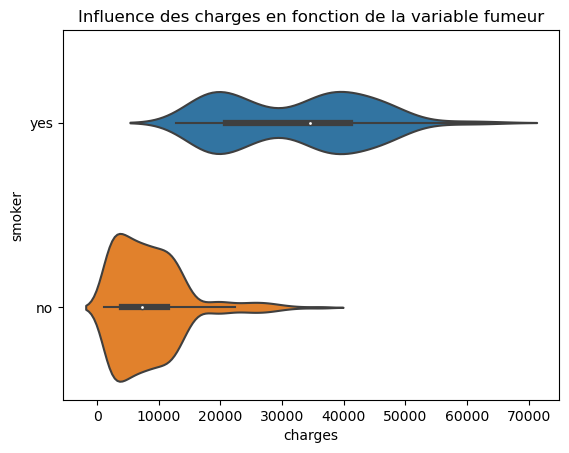

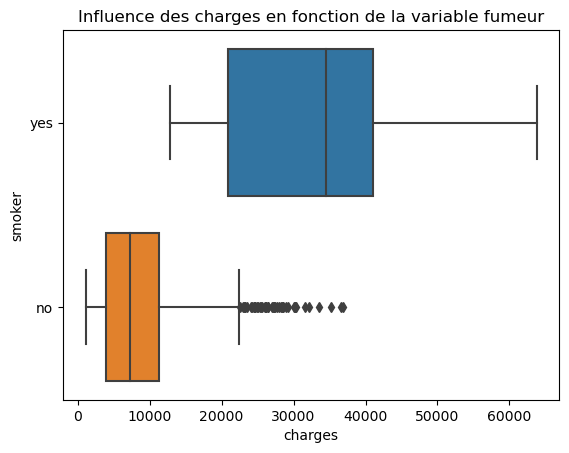

In [10]:

# Tracer un diagramme de dispersion avec ajustement linéaire
sns.violinplot(x=df['charges'], y=df['smoker'], data=df)
plt.title("Influence des charges en fonction de la variable fumeur")
plt.show()

sns.boxplot(x=df['charges'], y=df['smoker'], data=df)
plt.title("Influence des charges en fonction de la variable fumeur")
plt.show()

### Analyse de corrélation entre l'âge et le nombre d'enfants

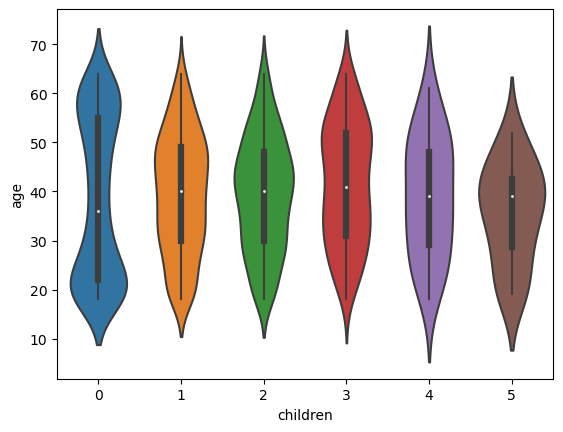

In [81]:
sns.violinplot(x=df['children'], y=df['age'], data=df)
plt.show()

### Analyse de corrélation entre l'IMC et les fumeurs

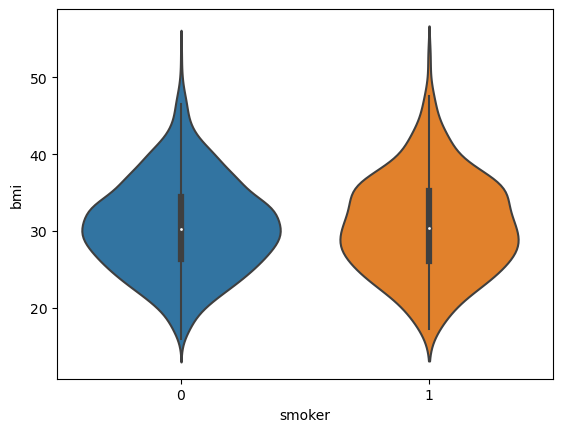

In [84]:
sns.violinplot(x=df['smoker'], y=df['bmi'], data=df)
plt.show()

# ANOVA entre Age et smoker

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8746
Date:                Mon, 15 Jan 2024   Prob (F-statistic):              0.350
Time:                        16:53:57   Log-Likelihood:                -5428.8
No. Observations:                1337   AIC:                         1.086e+04
Df Residuals:                    1335   BIC:                         1.087e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        39.4045      0.431     91.473

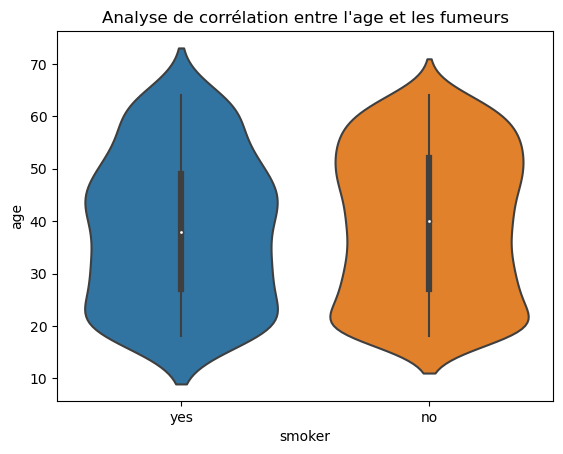

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

lm = smf.ols('age ~ smoker',data=df).fit()
print(lm.summary())

table = sm.stats.anova_lm(lm, typ=2)
print(table)

# F, p = stats.f_oneway(df[df['smoker'] == 'yes']['age'], df[df['smoker'] == 'no']['age'])
# print(p)


graph = sns.violinplot(x=df['smoker'], y=df['age'], data=df)
graph.set_title("Analyse de corrélation entre l'age et les fumeurs")
plt.show()



In [16]:
lm = smf.ols('charges ~ age',data=df).fit()
print(lm.summary())

table = sm.stats.anova_lm(lm, typ=2)
print(table)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     130.4
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           6.98e-29
Time:                        14:32:00   Log-Likelihood:                -14405.
No. Observations:                1337   AIC:                         2.881e+04
Df Residuals:                    1335   BIC:                         2.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3190.0217    938.396      3.399      0.0